# Fashion Mnist - FF - Keras

Dans ce notebook nous allons travailler sur Fashion MNIST un dataset plus conséquent que MNIST et construisant un reseau MLP avec Tensorflow - Keras

[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |




Le dataset est disponible dans [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

print(tf.__version__)

2.19.0


## Softmax

La function softmax permet de transformer les valeurs de sortie du réseau en valeurs dans l'intervale [0,1] et donc interpretable comme des probabilités.

Dans un contexte de classification avec N classe, le reseau produit un array de dimension N.

La classe la plus probable est celle avec la plus grande valeur.

Voici un exemple sur un array arbitraire

In [2]:
# soit un array de taille 4
inputs = np.array([[1.1, 3.3, 4.4, 2.2]])
inputs = tf.convert_to_tensor(inputs)
print(f'input: {inputs.numpy()}')

# appliquer la fonction softmax
outputs = tf.keras.activations.softmax(inputs)
print(f'output: {outputs.numpy()}')

# on verifie que la somme des probabilité est bien 1
sum = tf.reduce_sum(outputs)
print(f'somme des proba: {sum}')

# La categorie la plus probable est
prediction = np.argmax(outputs)
print(f'index categorie la plus probable: {prediction}')
print(f'soit la valeur : {inputs.numpy()[0][prediction]}')


input: [[1.1 3.3 4.4 2.2]]
output: [[0.02491168 0.22482822 0.67542129 0.07483881]]
somme des proba: 1.0
index categorie la plus probable: 2
soit la valeur : 4.4


In [3]:
# charger le dataset
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


LABEL: 0


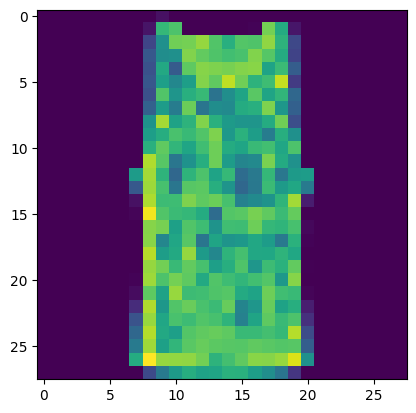

In [5]:
idx = 808
print(f'LABEL: {train_labels[idx]}')

plt.imshow(train_images[idx])

In [6]:
# Normaliser
train_images  = train_images / 255.0
test_images = test_images / 255.0

# Construire le modele

- Entrée : image de 28×28 pixels représentant un vêtement en niveaux de gris.

- Flatten : transformation de l’image 2D en un vecteur de 784 valeurs pour pouvoir l’envoyer dans un réseau dense.

- Dense 128 (ReLU) : couche entièrement connectée de 128 neurones qui apprend des représentations intermédiaires non linéaires grâce à l’activation ReLU.

- Dense 10 (Softmax) : couche de sortie de 10 neurones produisant une distribution de probabilités sur les 10 classes de Fashion-MNIST.

In [12]:
# Construire le modele

model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)]
)

In [14]:
# recap du modele

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## questions
- pourquoi la premiere couche est Flatten ?
- pourquoi la derniere couche est de dimension 10 ?


# Compiler le modele

- Optimizer Adam : algorithme d’optimisation adaptatif qui ajuste automatiquement le taux d’apprentissage pour accélérer et stabiliser l’entraînement du réseau.

- Loss sparse_categorical_crossentropy : fonction de coût adaptée à une classification multi-classes où les étiquettes sont données sous forme d’entiers (et non en one-hot).

- Métrique accuracy : mesure le pourcentage de prédictions correctement classées afin d’évaluer la performance du modèle pendant l’entraînement et la validation.

In [16]:
# build le modele

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Diff entre fonction de cout et metrique d'evaluation


La **fonction de coût** sert à entraîner le modèle : elle doit être **différentiable** pour guider l’optimisation, d’où l’usage de sparse_categorical_crossentropy.

La **métrique** sert seulement à évaluer les résultats : accuracy est simple à comprendre mais **non différentiable**, donc inutilisable pour l’apprentissage.

## questions
- que fait la fonction de cout : `sparse_categorical_crossentropy`
- on a choisi la metrique accuracy, peut on en prendre d'autres ?


In [17]:
# entrainer le modele
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7828 - loss: 0.6303
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8642 - loss: 0.3810
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8757 - loss: 0.3411
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8847 - loss: 0.3120
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8907 - loss: 0.2951


# Performance du modele

In [18]:
# evaluer le modele sur la partie test
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8784 - loss: 0.3387


[0.34660184383392334, 0.8762000203132629]

# Note:

La ligne affichée pendant l’exécution :

```accuracy: 0.8784 - loss: 0.3387```


est une estimation calculée batch par batch pendant l’évaluation.

Keras affiche une moyenne progressive arrondie à quelques décimales, principalement pour donner un aperçu visuel rapide.

Le tableau final :

```[0.34660184383392334, 0.8762000203132629]```


correspond au résultat exact recalculé sur l’ensemble complet du jeu de test, sans arrondi d’affichage. C’est cette valeur qui fait foi.

Evaluer le modele sur la partie train / entrainement permet de detecter l'overfit

In [19]:
model.evaluate(train_images, train_labels)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8989 - loss: 0.2686


[0.2698994576931, 0.8988833427429199]

# questions
- sur quoi peut-on jouer pour ameliorer la performance du modèle ?
- ce modèle est il en overfit ?

# Le modele au complet

In [20]:
# voici le code complet du modele

model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)]
)

model.summary()

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

train_score = model.evaluate(train_images, train_labels)
test_score = model.evaluate(test_images, test_labels)

print(f"train : {train_score}, test : {test_score} ")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7798 - loss: 0.6277
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8633 - loss: 0.3808
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8803 - loss: 0.3326
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8871 - loss: 0.3039
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8913 - loss: 0.2899
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8968 - loss: 0.2786
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - loss: 0.3570
train : [0.27856120467185974, 0.8975333571434021], test : [0.3560922145843506, 0.873199999332428] 


# Exploration

Dans la suite

- vous pouvez generer le code avec Gemini
- mais surtout, demandez des explications


- comment specifier le learning rate de l'optimizer ?
- que se passe t il (perf, overfit) quand on rajoute une couche cachée ?


## 1) Taille de la couche cachée : 512 puis 1024 neurones

Testez le même modèle en remplaçant la couche Dense(128) par 512 puis 1024 neurones.

Observez deux aspects :

- Performance : l’accuracy sur le jeu de validation s’améliore-t-elle réellement ou seulement sur le jeu d’entraînement ?

- Temps d’entraînement : le nombre de paramètres augmente fortement, donc chaque époque devient plus lente.

Comparez : nombre de paramètres, temps par époque, écart train/validation pour détecter un éventuel sur-apprentissage.

In [21]:
# Votre code

## 2) Optimizers disponibles et influence

Consultez la documentation de Keras pour lister les optimiseurs principaux : SGD, Adam, RMSprop, Adagrad, Adamax, Nadam…

[Keras Optimizers](https://keras.io/api/optimizers/)

Pour chacun, entraînez le même modèle quelques époques et observez :

- la vitesse de convergence de la loss,
- la stabilité des courbes,
- la performance finale.

Réfléchissez au rôle des optimiseurs adaptatifs (Adam, RMSprop) par rapport à SGD classique.

-> demandez à gemini de faire une fonction qui affiche la courbe de loss et celle de accuracy

In [ ]:
# Votre code

## 3) Ajouter une couche cachée supplémentaire

Ajoutez une seconde couche Dense intermédiaire, par exemple 128 → 64 → 10.
Étudiez :

- évolution de l’accuracy,
- apparition possible d’overfitting (train >> validation),
- besoin éventuel de régularisation.

Comparez avec le modèle à une seule couche.

In [22]:
# votre code

## 4) Régularisation : Dropout et L2

Lorsque le modèle apprend trop bien le jeu d’entraînement mais moins bien la validation, on parle d’overfitting.
Deux techniques classiques pour le limiter :

- Dropout : à chaque itération, une partie des neurones est désactivée aléatoirement, ce qui force le réseau à apprendre des représentations plus robustes.
- L2 (weight decay) : on pénalise les poids trop grands dans la fonction de coût.

Essayez par exemple :

```python
tf.keras.layers.Dense(128, activation='relu',
                      kernel_regularizer=tf.keras.regularizers.l2(0.001)),
tf.keras.layers.Dropout(0.3),
```

Comparez les courbes train/validation avec et sans régularisation et observez si l’écart se réduit.

In [24]:
# votre code

## 5) Nombre d’époques et early stopping

Plus on entraîne longtemps, plus la loss d’entraînement baisse, mais la validation peut se dégrader.

Tracez les courbes d’accuracy et de loss sur plusieurs dizaines d’époques.

Objectifs :

- repérer l’époque où la validation commence à stagner ou à remonter,
- éviter d’entraîner inutilement.

Testez l’outil :

```python
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True)
```

Analysez le compromis entre sous-apprentissage et sur-apprentissage.

In [ ]:
# votre code

## 6) Fonctions d’activation

ReLU n’est pas la seule option. Comparez :

- ReLU : simple et efficace, mais peut “mourir” si les activations deviennent négatives.
- tanh : bornée entre −1 et 1, apprentissage parfois plus stable mais gradients plus faibles.
- LeakyReLU : version améliorée de ReLU qui laisse passer un petit gradient négatif.

Modifiez la couche cachée :

```python
tf.keras.layers.Dense(128, activation='tanh')
```

ou

```python
tf.keras.layers.Dense(128),
tf.keras.layers.LeakyReLU(alpha=0.1)
```

Comparez vitesse de convergence, performance finale et stabilité des courbes.